In [100]:
import urllib.request
import urllib.parse
import json
import pprint

class CoreApiRequestor:

    def __init__(self, endpoint = 'https://core.ac.uk:443/api-v2/', api_key = 'aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd'):
        self.endpoint = endpoint
        self.api_key = api_key
        #defaults
        self.pagesize = 100
        self.page = 1

    def parse_response(self, decoded):
        res = []
        for item in decoded['data']:
            doi = None
            if 'identifiers' in item:
                for identifier in item['identifiers']:
                    if identifier and identifier.startswith('doi:'):
                        doi = identifier
                        break
            res.append([item['title'], doi])
        return res

    def request_url(self, url):
        with urllib.request.urlopen(url) as response:
            html = response.read()
        return html

    def get_method_query_request_url(self,method,query,fullText,page):
        if (fullText):
            fullText = 'true'
        else:
            fullText = 'false'
        params = {
            'apiKey':self.api_key,
            'page':page,
            'pageSize':self.pagesize,
            'fulltext':fullText
        }
        return self.endpoint + method + '/' + urllib.parse.quote(query) + '?' + urllib.parse.urlencode(params)

    def get_up_to_x_pages_of_query(self,method,query,fulltext,x = 20):
        url = self.get_method_query_request_url(method,query,fulltext,1)
        all_articles=[]
        resp = self.request_url(url)
        result = json.loads(resp.decode('utf-8'))
        all_articles.append(result)
        if (result['totalHits']>100):
            numOfPages = int(result['totalHits']/self.pagesize)  #rounds down
            if (numOfPages>x):
                numOfPages=x
            for i in range(2,numOfPages):
                url = self.get_method_query_request_url(method,query,False,i)
                print(url)
                resp =self.request_url(url)
                all_articles.append(json.loads(resp.decode('utf-8')))
        return all_articles

In [101]:
'''
Example invokation
'''
# init 
endpoint = 'https://core.ac.uk/api-v2'

'''
********************************************
Add your own api key below
'''
api_key = 'aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd'
'''
********************************************
'''

core_api = CoreApiRequestor(endpoint,api_key)

In [102]:
method = '/articles/search'
topic = 'machine AND learning'

queryOnlyFT = '(title:('+topic+') OR description:('+topic+') OR fullText:('+topic+')) AND fullText:*'

url = core_api.get_method_query_request_url(method,topic,True,1)

In [120]:
result = core_api.get_up_to_x_pages_of_query(method,topic,True,1000)

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=2&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=3&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=4&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=5&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=6&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=7&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=8&pageSize=100&fulltext=false
https:

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=60&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=61&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=62&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=63&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=64&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=65&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=66&pageSize=100&fulltext=false

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=118&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=119&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=120&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=121&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=122&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=123&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=124&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=175&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=176&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=177&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=178&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=179&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=180&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=181&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=232&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=233&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=234&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=235&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=236&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=237&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=238&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=289&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=290&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=291&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=292&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=293&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=294&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=295&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=346&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=347&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=348&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=349&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=350&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=351&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=352&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=403&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=404&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=405&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=406&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=407&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=408&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=409&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=460&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=461&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=462&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=463&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=464&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=465&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=466&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=517&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=518&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=519&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=520&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=521&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=522&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=523&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=574&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=575&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=576&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=577&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=578&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=579&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=580&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=631&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=632&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=633&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=634&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=635&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=636&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=637&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=688&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=689&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=690&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=691&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=692&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=693&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=694&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=745&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=746&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=747&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=748&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=749&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=750&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=751&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=802&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=803&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=804&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=805&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=806&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=807&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=808&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=859&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=860&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=861&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=862&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=863&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=864&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=865&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=916&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=917&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=918&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=919&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=920&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=921&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=922&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=973&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=974&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=975&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=976&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=977&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=978&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=979&pageSize=100&fulltex

In [121]:
import pickle
f = open('machine-AND-learning_1000-page_dump.pkl','wb+')
pickle.dump(result,f)
f.close()

In [6]:
import pickle
f = open('machine-AND-learning_1000-page_dump.pkl','rb')
result = pickle.load(f)
f.close()

In [7]:
docs = []
for page in result:
    dt = page['data']
    for article in dt:
        if ('description' in article) and ('title' in article):
            docs.append(article['title'] + ' . ' + article['description'])
        elif ('description' in article):
            docs.append(article['description'])
        elif ('title' in article):
            docs.append(article['title'])

In [8]:
len(docs)

18990

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input = 'content')

In [10]:
docs_mat = tfidf.fit_transform(docs)

In [11]:
print(docs_mat.size)

1801477


In [61]:
import numpy as np

hist = []

for x,y in zip(docs_mat.nonzero()):
    hist[docs_mat[x,y]]

8.6168215752226089

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer(input = 'content', stop_words = 'english', ngram_range = (1,3))

In [125]:
tf_mat = tf.fit_transform(docs)

In [126]:
tc_x = tf_mat.sum(axis=0)
dc_y = tf_mat.getnnz(axis=0)

In [29]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [127]:
import numpy as np
tf_x = np.asarray(tc_x[:]/tc_x.max())
idf_y = 1 - dc_y[:]/dc_y.max()

<function matplotlib.pyplot.show>

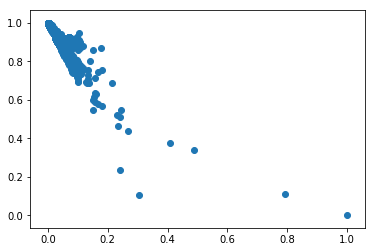

In [128]:
plt.scatter(tf_x, idf_y)
plt.show

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go

In [38]:
trace = go.Scatter(x = tf_x, y =  idf_y)
data = [trace]

In [ ]:
py.iplot(data)

In [129]:
ids = np.where([tf_x[:] > 0.1, tf_x[:] < 0.8])

In [133]:
print(ids[2][0:49])

[  57370   63804   76099   96647  143270  244282  265294  332359  376577
  412747  439754  490393  620065  648813  676729  735978  747689  791360
  792196  814082  832413  838502  855616  864703  881037  894585  897963
  903449  967485  974314  995425 1042803 1057472 1087345 1116381 1126951
 1181511 1236063 1357276 1378800 1396002 1401125 1415912 1435174 1447688
 1456398 1460051 1469445 1515944]


In [134]:
names = tf.get_feature_names()
keywords = []
for i in ids[2][0:49]:
    keywords.append(names[i])
    
keywords

['algorithm',
 'algorithms',
 'analysis',
 'approach',
 'based',
 'comment',
 'computational',
 'data',
 'detection',
 'distribution',
 'efficient',
 'examples',
 'high',
 'implementation',
 'information',
 'large',
 'learning',
 'machine',
 'machine learning',
 'matrix',
 'method',
 'methods',
 'model',
 'models',
 'multiple',
 'network',
 'networks',
 'new',
 'paper',
 'parameter',
 'performance',
 'present',
 'problem',
 'propose',
 'random',
 'real',
 'results',
 'sensor',
 'survey',
 'techniques',
 'theory',
 'time',
 'training',
 'ud',
 'uniform',
 'use',
 'used',
 'using',
 'work']

In [136]:
f = open('machine-AND-learning_1000-page_keywords_tfx-0.1-0.8.pkl','wb+')
pickle.dump(keywords,f)
f.close()

In [43]:
ids = np.dot(ids[0],ids[1])

In [44]:
print(ids)

0
